# Anisotropic Form Factors

Scientists frequently use diffraction patterns to study structure at the nanoscale.
In many cases, it is sufficient to model radiation as scattering off of isotropic bodies arranged in an anisotropic manner, as atoms in a crystal.
However, in some cases the scatterers may themselves be anisotropic, in which case it is also necessary to account for the different scattering in different directions caused by the shape of the scatterers.
In scattering theory, this distinction is captured by splitting the total scattering density into two parts, the structure factor (which describes scattering caused by the arrangement of particles) and the form factor (which describes scattering due to the shapes of the particles).
Computing form factors for all but a few shapes can be a difficult matter, so **coxeter** simplifies that for you.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import coxeter

As a demonstration, let's use a tetrahedron.

In [2]:
R = 1
sphere = coxeter.shapes.Sphere(R)
tetrahedron = coxeter.families.PlatonicFamily.get_shape("Tetrahedron")
tetrahedron.insphere_radius = sphere.radius

The form factor is computed at user-specified vectors in reciprocal space.
For example, here's the form factor of a tetrahedron at a few points in reciprocal space.

In [27]:
tetrahedron.compute_form_factor_amplitude(np.array([[1, 0, 0], [2, 0, 0]]))

array([10.24019611+0.52644567j,  3.91828341+2.15816328j])

As previously mentioned, a critical property of the form factor is that it is anistropic.
This means that the form factor depends on the direction of the incident radiation.
To capture this fact, let's look at how the form factor varies along the three coordinate axes for this tetrahedron.
For comparison, we'll do a comparable calculation for a sphere.

In [11]:
q = np.linspace(0.0001, 20, 100)
rho = 0.0005
qR = q * R

q_vectors_x = np.zeros((q.shape[0], 3))
q_vectors_y = np.zeros((q.shape[0], 3))
q_vectors_z = np.zeros((q.shape[0], 3))
q_vectors_x[:, 0] = q
q_vectors_y[:, 1] = q
q_vectors_z[:, 2] = q
F_tet_x = tetrahedron.compute_form_factor_amplitude(q_vectors_x, density=rho)
F_tet_y = tetrahedron.compute_form_factor_amplitude(q_vectors_y, density=rho)
F_tet_z = tetrahedron.compute_form_factor_amplitude(q_vectors_z, density=rho)

The form factor of a sphere is a good baseline for comparison.
Since a sphere is isotropic, so is its form factor, and it provides a quantitative basis for comparison to the tetrahedron.

In [29]:
F_sphere = sphere.compute_form_factor_amplitude(q_vectors_x, density=rho)

Finally, let's use a plot to visualize the results.

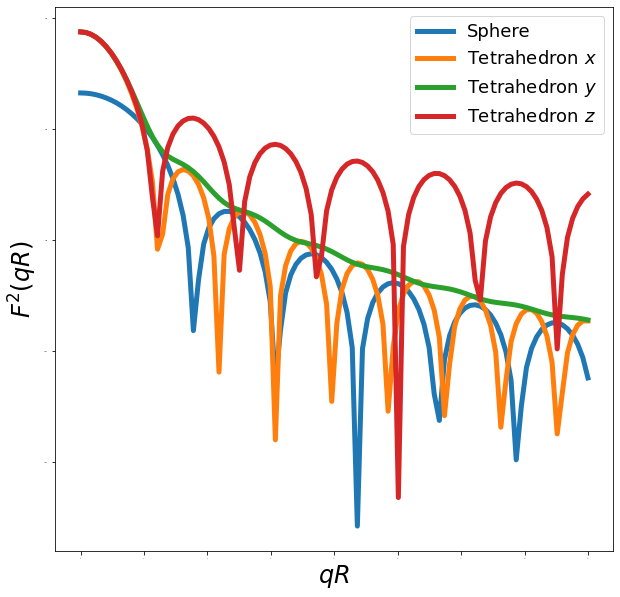

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.semilogy(qR, (F_sphere.real) ** 2, label="Sphere", lw=5)

scale_factor = F_sphere[0].real / F_tet_x[0].real
ax.semilogy(
    qR, (scale_factor * F_tet_x.real) ** 2 * 4 * np.pi, label="Tetrahedron $x$", lw=5
)
ax.semilogy(
    qR, (scale_factor * F_tet_y.real) ** 2 * 4 * np.pi, label="Tetrahedron $y$", lw=5
)
ax.semilogy(
    qR, (scale_factor * F_tet_z.real) ** 2 * 4 * np.pi, label="Tetrahedron $z$", lw=5
)

ax.legend(loc="best", fontsize=18)
ax.set_xlabel(r"$qR$", fontsize=24)
ax.set_ylabel(r"$F^2(qR)$", fontsize=24)
ax.tick_params(which="both", axis="both", labelsize=0)

Evidently, the form factor varies substantially along different coordinate axes for the tetrahedron.
While the x and z axis results are relatively similar, the form factor along the y axis is far less oscillatory.
Moreover, all three results contain many more interesting results than the sphere's form factor, which is essentially just a simple periodic wave.
Note that all these results are subject to global transformation laws, i.e. they depend on the orientation of the tetrahedron used in this calculation.
If the tetrahedron were to rotate, then the results would shift accordingly.